In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [371]:
# python의 머신러닝 패키지
# !pip install scikit-learn 

In [372]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [374]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 결측치 찾기 .isna()

In [375]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [376]:
len(data)

891

결측치 / 전체데이터 * 100 = 결측의 비율

In [377]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Age, Cabin, Embarked에 결측값이 발견되어 처리

### 1) 단순대치법 (simple imputation)

#### (1) 완전분석 => 결측값이 있는 모든 행을 삭제하고 완전한 자료만으로 분석  (잘 안씀)
* 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우
* 결측값을 삭제한 후에 데이터에 편향이 없다는 전제가 있을 때
* .dropna() => 결측값이 있는 모든 행 삭제

In [378]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [379]:
183 / 891 * 100

20.53872053872054

#### (2) 평균 대치법 : 결측치가 있는 컬럼에서 데이터의 평균을 구한 후 결측값을 대치
* 평균을 이용하기 때문에 간편
* 데이터에 이상치가 있을 경우 평균을 이용할 수 없다.
* 데이터에 이상치가 있는 경우에는 중앙값이나 최빈값을 고려해야 한다.

In [380]:
# 평균
a = np.array([24, 5, 10, 34, 20, 18, 28, 20])
a.mean()

np.float64(19.875)

In [381]:
# 평균 
b = np.array([24, 5, 10, 34, 20, 18, 28, 200])
b.mean() 

np.float64(42.375)

In [382]:
# 중앙값 홀수 정중앙 값
c = np.array([24, 5, 10, 34, 20, 18, 28, 20])
np.median(c)

np.float64(20.0)

In [383]:
# 중앙값  중앙값 2개의 평균
d = np.array([24, 5, 10, 34, 20, 18, 28, 200])
np.median(d)

np.float64(22.0)

전체 데이터 프레임에서 Age 컬럼에 결측값이 있는 행만 추출

In [384]:
data[data['Age'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


결측값이 있는 컬럼을 나중에 다시 확인하고 싶을 때<br>
1. isna() == True로 결측값이 있는 컬럼 추출
2. 추출된 데이터 프레임의 index 추출 .index
3. 추출한 인덱스를 변수에 저장
3. 데이터프레임.iloc[index] 로 조회


In [385]:
na_index = data[data['Age'].isna() == True].index

In [386]:
na_index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [387]:
data.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* .fillna(대치할 값) 로 평균 대치 하기

In [388]:
data_mean = data.copy()
data_median = data.copy()
data_mode = data.copy()

In [389]:
print(id(data_mean))
print(id(data_median))
print(id(data_mode))

1759991928464
1759983795600
1759991954448


In [390]:
# mean 30
data_mean['Age'] = data_mean['Age'].fillna(round(data_mean['Age'].mean()))

In [391]:
data_mean['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [392]:
data_mean.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,30.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,30.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,30.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,30.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,30.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,30.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,NaN,S


In [393]:
# median 28
data_median['Age'] = data_median['Age'].fillna(round(data_median['Age'].median())) 

In [394]:
data_median.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,28.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,28.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,NaN,S


In [395]:
data['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [396]:
# 최빈값으로 대치하기 mode  24
data_mode['Age'] = data_mode['Age'].fillna(24.0)

In [397]:
data_mode.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


scikit-learn 라이브러리의 SimpleImputer: 평균, 중앙값, 최빈값 대치

In [398]:
from sklearn.impute import SimpleImputer

In [399]:
# 평균으로 대치 mean
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [400]:
# 중앙값으로 대치 median
imp_mean = SimpleImputer(strategy='median')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

In [401]:
# 최빈값으로 대치 mode = most_frequent 24
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit_transform(data['Age'].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 24.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 24.  ,
       31.  , 24.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 24.  ,
       19.  , 24.  , 24.  , 40.  , 24.  , 24.  , 66.  , 28.  , 42.  ,
       24.  , 21.  , 18.  , 14.  , 40.  , 27.  , 24.  ,  3.  , 19.  ,
       24.  , 24.  , 24.  , 24.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 24.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 24.  , 24.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 24.  , 24.  ,  0.83, 30.  , 22.  ,
       29.  , 24.  , 28.  , 17.  , 33.  , 16.  , 24.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 24.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 24.  , 21.  , 33.  , 37.  , 28.  , 21.  , 24.  ,
       38.  , 24.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 24.  , 32.5 , 32.5 , 54.  , 12.  ,
       24.  , 24.  ,

* KNN(K-Nearest Neighbors) 최근접이웃 대치법

In [402]:
from sklearn.impute import KNNImputer

In [403]:
data_knn = data.copy()

In [404]:
knn_imputer = KNNImputer(n_neighbors=5)
data_knn['Age'] = knn_imputer.fit_transform(data_knn['Age'].values.reshape(-1,1))[:,0]

In [405]:
data_knn.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


# 깊은복사 얕은 복사

In [406]:
data_test = data.copy()

In [407]:
data_test2 = data_test

In [408]:
id(data)

1759991940688

In [409]:
data_test3 = data.copy()
id(data_test3)

1759992191824

In [410]:
data_test4 = data_test3
id(data_test4)

1759992191824

In [411]:
# id => 컴퓨터 메모리의 주소값  주소값이 같음 = 같은 값, 같은 변수, 
id(data_test2)

1759820099536

In [412]:
id(data_test)

1759820099536

In [413]:
data_test2['Age'] = data_test2['Age'].fillna(25)

In [414]:
data_test2.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,25.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,NaN,S


In [415]:
data_test.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,25.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,NaN,S


In [416]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin 컬럼은 결측값 비율이 77%라서 삭제

In [417]:
del data_mean['Cabin']

In [418]:
data_mean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [419]:
data_median = data_median.drop('Cabin', axis=1)

In [420]:
data_median

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [421]:
data_mode.drop('Cabin', axis=1, inplace=True)

In [422]:
data_mode

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [423]:
data_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [424]:
data_mode.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [425]:
# 명목형 자료, 범주형 자료
data_mode['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [426]:
data_mode['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [427]:
data_mode['Embarked'] = data_mode['Embarked'].fillna('S')

In [428]:
data_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [429]:
data_mean['Embarked'] = data_mean['Embarked'].fillna('S')
data_median['Embarked'] = data_median['Embarked'].fillna('S')
data_knn['Embarked'] = data_knn['Embarked'].fillna('S')

In [430]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [431]:
data_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [432]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [433]:
data_knn.drop('Cabin', axis=1, inplace=True)

In [434]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# 이상값
* 이상값이란 전체 데이터 분포에서 정상 범위에 속하지 않는 데이터
* z-score가 -3 - 3 범위를 벗어나는 경우 = 이상값
* 평균을 기준으로 평균에서 표준편차 +- 3 을 넘는 값 = 이상값
* IQR(사분위수)기준 이상값
  * 하위 이상값: Q1(25%) - (1.5*IQR(Q3-Q1)) 을 넘어가는 값
  * 상위 이상값: Q3(75%) + (1.5*IQR(Q3-Q1)) 을 넘어가는 값

* 상자수염 그리고 이상값 탐지하기

<Axes: >

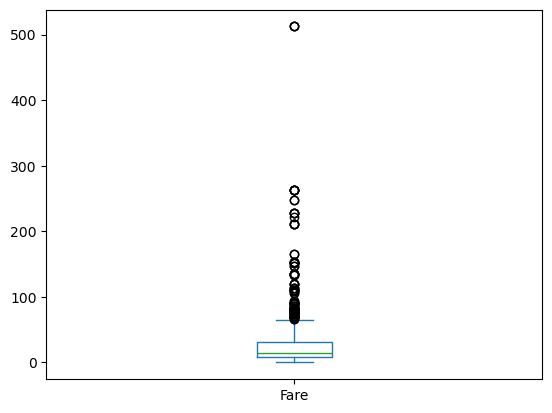

In [435]:
data['Fare'].plot(kind='box')

<Axes: >

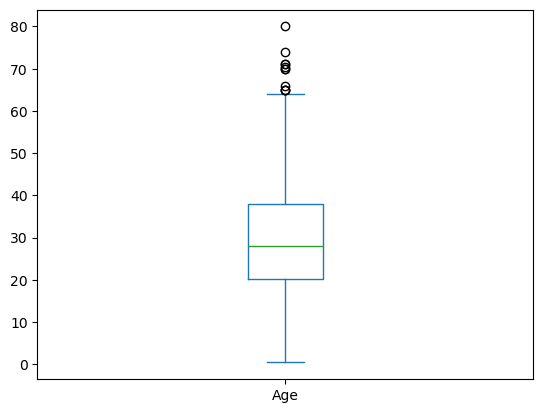

In [436]:
data['Age'].plot(kind='box')

In [437]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [438]:
# describe로 구한 Q1, Q3으로 이상치 범위 구하기
minimun = 7.910400 - (1.5 * (31.000000 - 7.910400))
maximun = 31.000000 + (1.5 * (31.000000 - 7.910400))
print("minimun: ", minimun)
print("maximun: ", maximun)

minimun:  -26.724
maximun:  65.6344


* 이상치를 초과하는 행 조회하기 = Fare가 65.6344를 초과하는 행 찾기

In [439]:
data[data['Fare'] > 65.6344]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [440]:
data[['Pclass', 'Fare']].groupby('Pclass').describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [441]:
263/3

87.66666666666667

In [442]:
#pclass1의 fare의 정상범위
93.5 + (1.5 * (93.5 - 30.92395))

187.36407499999999

In [443]:
30.92395 - (1.5 * (93.5 - 30.92395))

-62.94012499999998

In [444]:
# 2등실의 정상범위
26.0 + (1.5 * (26.0 - 13.00000))

45.5

In [445]:
# 3등실의 정상범위
15.5 + (1.5 * (15.5 - 7.75000))

27.125

In [446]:
data[data['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


## Winsorlization: 이상치를 처리하는 방법
* IQR로 구한 정상범위 최대값을 이용해서 정상범위를 넘어가는 값을 정상범위 최대값으로 대치

In [447]:
outliers = data[data['Fare'] > 187.36407499999999]

In [448]:
outliers['Fare'] = 187.36407499999999

C:\Users\5-07\AppData\Local\Temp\ipykernel_9832\218407711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Fare'] = 187.36407499999999


In [449]:
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,187.364075,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,187.364075,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,187.364075,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,187.364075,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,187.364075,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,187.364075,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,187.364075,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,187.364075,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,187.364075,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,187.364075,C23 C25 C27,S


<Axes: ylabel='Frequency'>

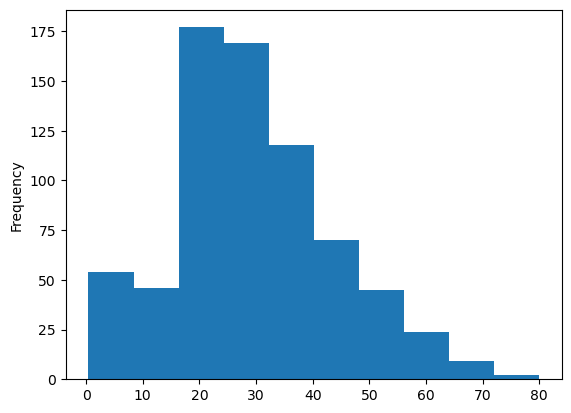

In [450]:
data['Age'].plot(kind='hist')

In [451]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [452]:
# 상관관계 -1 0 1
data[['Pclass', 'Survived', 'Fare', 'Age']].corr()

,Pclass,Survived,Fare,Age
Pclass,1.000000,-0.338481,-0.549500,-0.369226
Survived,-0.338481,1.000000,0.257307,-0.077221
Fare,-0.549500,0.257307,1.000000,0.096067
Age,-0.369226,-0.077221,0.096067,1.000000


## 데이터 전처리를 안하고 알고리즘에 넣었을 때 생기는 일

In [453]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [454]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [455]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [456]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [458]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(y_test, pred)

ValueError: could not convert string to float: 'Strom, Miss. Telma Matilda'

# EDA 탐색적 데이터 분석

### 범주형 자료를 숫자로 변환하기

In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [460]:
data = data.drop(['Name', 'Cabin'], axis=1)
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C


In [461]:
data['Ticket'].nunique()

681

In [462]:
data.drop('Ticket', axis=1, inplace= True)

In [463]:
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


성별 컬럼을 숫자로 변환하기
* .str.replace를 사용해 숫자로 변환하기
* apply(lambda )를 사용해 숫자로 변환하기
* label encoder를 사용해 숫자로 변환하기
* one-hot encoder를 사용해 숫자로 변환하기
* get_dummies를 사용해 더미변수화하기

In [464]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()
data5 = data.copy()

### .str.replace를 사용해서 변환

In [ ]:
data1['Sex'] = data1['Sex'].str.replace("female", '1').str.replace("male", '0')

In [ ]:
data1.head()

In [ ]:
data1.info()

In [ ]:
data1['Sex'] = data1['Sex'].astype('int')
data1.info()

In [ ]:
data1['Embarked'] = data1['Embarked'].fillna('S')

In [ ]:
data1['Embarked'].unique()

In [ ]:
data1['Embarked'] = data1['Embarked'].str.replace("S", "0").str.replace("C", "1").str.replace("Q", "2")

In [ ]:
data1.head()

In [ ]:
data1.info()

In [ ]:
data1['Embarked'] = data1['Embarked'].astype('int')

In [ ]:
data1.info()

In [ ]:
data1['Age'] = data1['Age'].fillna(data1['Age'].mean())
data1.info()

In [ ]:
X = data1.drop('Survived', axis=1)
y = data1['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 8)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
result =pd.DataFrame({"실제값: ": y_test, "예측값: ": pred})
result

In [ ]:
# 평가 
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

apply 함수를 이용해서 data2의 범주형 변수를 명목형, 서열형 변수로 바꿔주세요.

In [ ]:
data2.info()

In [ ]:
def sex2num(x):
    if x == "male":
        return 0
    else:
        return 1

In [ ]:
# data2['Sex'].apply(sex2num)과 동일 
data2['Sex'].apply(lambda x: sex2num(x))

In [ ]:
# 코드 간단하면 한 줄로 가능
data2['Sex'] = data2['Sex'].apply(lambda x: 0 if x =='male' else 1)

In [ ]:
data2.info()

In [ ]:
data2['Embarked'] = data2['Embarked'].fillna('S')

In [ ]:
data2.info()

In [ ]:
data2['Embarked'].unique()

In [ ]:
def em2num(x):
    if x == "S":
        return 0
    elif x == 'C':
        return 1
    else:
        return 2

In [ ]:
data2['Embarked'] = data2['Embarked'].apply(em2num)
data2.info()

In [ ]:
data2.head(10)

In [ ]:
data2['Embarked'].value_counts()

## label encoder를 사용해 범주형 변수 변환하기
* from sklearn.preprocessing import LabelEncoder : 임포트
* le = LabelEncoder() : 레이블 인코더 인스턴스 생성
* data['Sex'] =le.fit_transform(data['Sex']) : Sex 컬럼 안에 있는 카테고리 male과 female이 숫자 0, 1로 변환
* le.inverse_transform([변환할 숫자) : 숫자로 변환된 것을 다시 문자로 되돌리고 싶을 때
* 변환할 카테고리 변수 수 만큼 인스턴스를 생성해야 나중에 복원 가능
* le => Sex 컬럼
* le2 => Embarked 컬럼

In [ ]:
data3.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test =le.fit(data3['Sex'])
le.classes_
result = le.transform(data3['Sex'])
# le.inverse_transform([0, 0, 1, 2])

In [ ]:
print(test)

In [ ]:
test

In [ ]:
result

In [ ]:
# 훈련& 결과 동시에 해결
# 레이블 인코더 임포트 하기
from sklearn.preprocessing import LabelEncoder
# 레이블 인코더 인스턴스 생성
le = LabelEncoder()

result =le.fit_transform(data3['Sex'])
# le.classes_
print(result)
type(result)

In [ ]:
# 훈련& 결과 동시에 해결
# 레이블 인코더 임포트 하기
from sklearn.preprocessing import LabelEncoder
# 레이블 인코더 인스턴스 생성
le = LabelEncoder()

data3['Sex'] =le.fit_transform(data3['Sex'])
print(data3['Sex'])
print(type(data3['Sex']))

In [ ]:
# 역변환
le.inverse_transform(data3['Sex'])

In [ ]:
# 역변환
le.inverse_transform([0,1,1])

In [ ]:
# 배열로 변환하는 속성
print(le.classes_)

In [ ]:
# 역변환
le.inverse_transform(result)

label encoder를 사용해서 Embarked를 숫자형 데이터로 변환

In [ ]:
data3.head()

In [ ]:
data3['Embarked'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 레이블 인코더 인스턴스 생성 / le는 성별에 대해 했기 때문에 le2로 변수 이름 바꿈 
le2 = LabelEncoder()

data3['Embarked'] =le2.fit_transform(data3['Embarked'])
print(data3['Embarked'])
print(type(data3['Embarked']))

In [ ]:
le2.inverse_transform(data3['Embarked'])

In [ ]:
le2.inverse_transform([0,1,2])

In [ ]:
data3.head()

## one-hot encoder로 카테고리 변수 숫자로 변환하기

In [ ]:
data4.head(2)

In [ ]:
# 많이 쓰이진 않음

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(data4[["Sex"]])
print(result)

## get_dummies로 더미변수 만들어 원핫인코딩하기
* 제일 많이 쓰임
* 편하긴 한데 컬럼이 많이 늘어남

In [ ]:
data5.head()

In [ ]:
pd.get_dummies(data5)

### get_dummies를 사용하면 카테고리 개수 만큼 컬럼이 증가하므로 다중공선성 문제가 발생
### 컬럼 수 증가를 최소화 하기 위해서 drop_first는 옵션을 사용해서 컬럼 수를 감소 시킴

In [ ]:
data5.head()

In [ ]:
# 이미 할당 해놔서 다시 실행하면 오류
data5 = pd.get_dummies(data5, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [ ]:
data5
# embarked 컬럼 같은 경우 서열이 나뉘어져 있는 게 아니기 때문에 더미변수로 하는 게 나음(명목형 변수)

In [ ]:
data5.info()

In [ ]:
data5['Age'].unique()

In [ ]:
data5['Age'] = data5['Age'].fillna(data5["Age"].mean())

In [ ]:
data5.head(2)

In [ ]:
X = data5.drop('Survived', axis=1)
y = data5['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

## 변수 간의 상관관계 분석하기
* 상관관계 = -1 0 1의 범위를 가짐
* -1에 가까우면 음의 상관관계 / 반비례 관계
* 집과 역의 거리가 멀면 월세가 저렴해진다.
* 0은 관계 X
* 1에 가까우면 양의 상관관계 / 비례 관계
* 날씨가 더워지면 에어컨 사용량이 증가한다.
<br><br>
* pearson 상관관계 분석 => 연속형 데이터들 간의 상관관계
* Spearman 상관관계 분석 => 서열형, 카테고리형(범주형) 데이터를 포함해서 상관관계 계산

In [465]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [467]:
data['Age'] = data['Age'].fillna(data["Age"].mean())

In [468]:
data['Embarked'] = data['Embarked'].fillna('S')

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [470]:
data = data.drop('PassengerId', axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [471]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [472]:
# Sex, Embarked 컬럼은 문자형이어서 빼줌(명목형 변수)
data_corr = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

## 인과관계& 상관관계는 구분해야 함
* 온도 증가 => 에어컨 사용량 증가(인과& 상관 둘 다 O)
* 초등학교 多 => 범죄율 증가(상관관계, 범죄율이 증가할 수록 초등학교가 많은 건 아님) 

In [ ]:
# !pip install seaborn

In [473]:
import seaborn as sns

<Axes: >

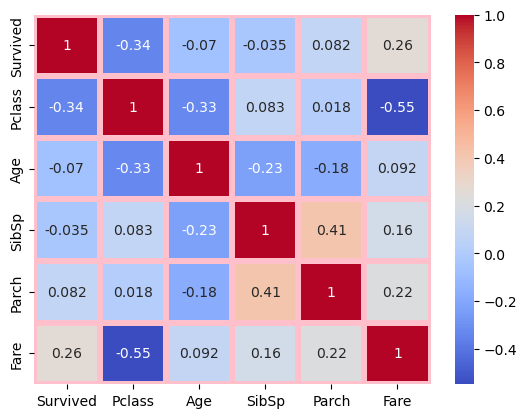

In [474]:
sns.heatmap(data_corr, cmap='coolwarm', annot=True, linecolor='pink', linewidth=3)

In [475]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [476]:
data_corr = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr('spearman')

<Axes: >

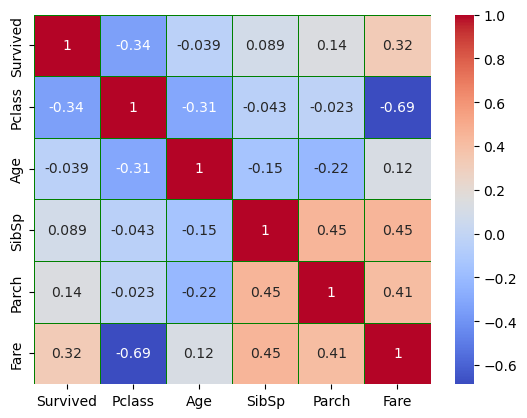

In [477]:
sns.heatmap(data_corr, cmap='coolwarm', annot=True, linecolor='green', linewidth=0.5)

In [478]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Sex'] =le.fit_transform(data['Sex'])
print(data['Sex'])
print(type(data['Sex']))

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
<class 'pandas.core.series.Series'>


In [479]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()

data['Embarked'] =le2.fit_transform(data['Embarked'])
print(data['Embarked'])
print(type(data['Embarked']))

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64
<class 'pandas.core.series.Series'>


In [480]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [481]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


In [482]:
data_corr2 = data.corr(method='spearman')
data_corr2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.339668,-0.543351,-0.039109,0.088879,0.138266,0.323736,-0.160196
Pclass,-0.339668,1.000000,0.135775,-0.308875,-0.043019,-0.022801,-0.688032,0.091977
Sex,-0.543351,0.135775,1.000000,0.067809,-0.195204,-0.254512,-0.259593,0.115412
Age,-0.039109,-0.308875,0.067809,1.000000,-0.147035,-0.217290,0.118847,-0.024295
SibSp,0.088879,-0.043019,-0.195204,-0.147035,1.000000,0.450014,0.447113,0.011157
Parch,0.138266,-0.022801,-0.254512,-0.217290,0.450014,1.000000,0.410074,0.028365
Fare,0.323736,-0.688032,-0.259593,0.118847,0.447113,0.410074,1.000000,-0.074873
Embarked,-0.160196,0.091977,0.115412,-0.024295,0.011157,0.028365,-0.074873,1.000000


In [483]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [484]:
le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

<Axes: >

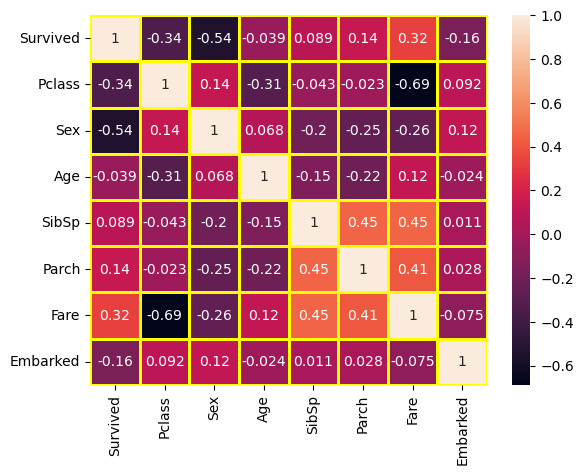

In [485]:
sns.heatmap(data_corr2, annot=True, linecolor='yellow', linewidth=1)

# 각 컬럼별 데이터 분포 파악 및 시각화

In [486]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [488]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='Density'>

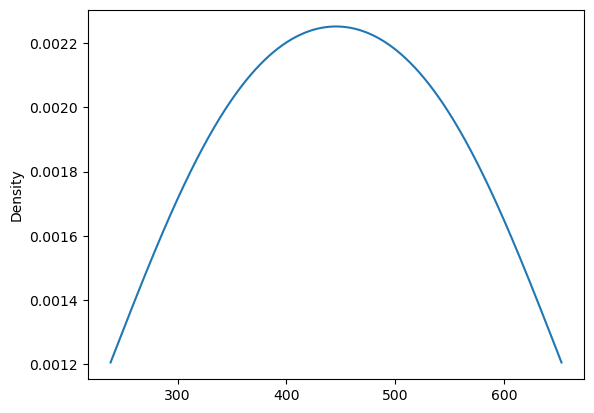

In [495]:
data['Survived'].value_counts().plot(kind='kde')

In [496]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

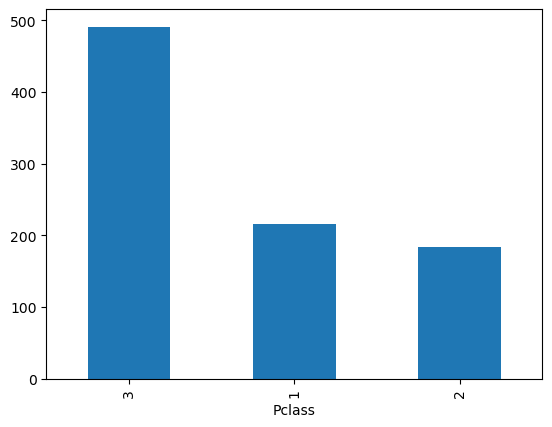

In [497]:
data['Pclass'].value_counts().plot(kind='bar')

In [498]:
data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

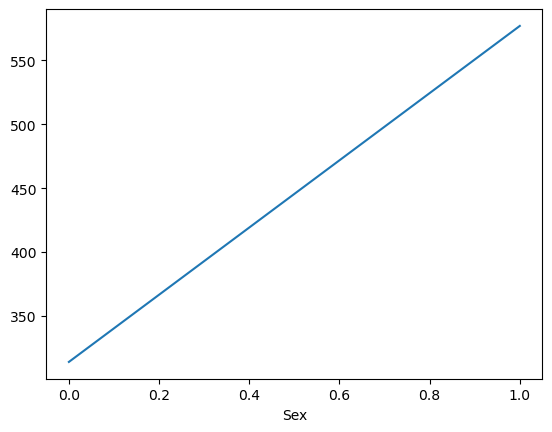

In [499]:
data['Sex'].value_counts().plot(kind='line')

In [500]:
data['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

<Axes: ylabel='Frequency'>

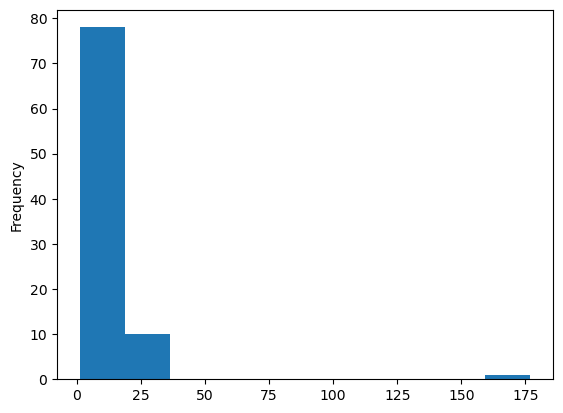

In [504]:
# 구간이 나눠져있는 건 히스토그램으로 봐야 편함
data['Age'].value_counts().plot(kind='hist')

<Axes: xlabel='Age', ylabel='Count'>

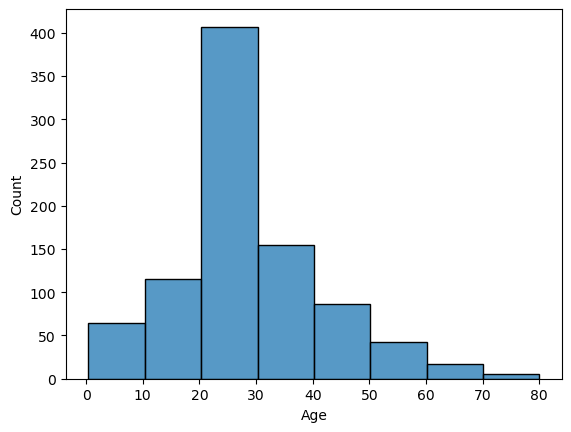

In [509]:
# 좀 더 예쁘게 시각화 / bins => 그래프 개수
sns.histplot(data['Age'], bins=8)

C:\Users\5-07\AppData\Local\Temp\ipykernel_9832\1961934568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], bins=10)


<Axes: xlabel='Age', ylabel='Density'>

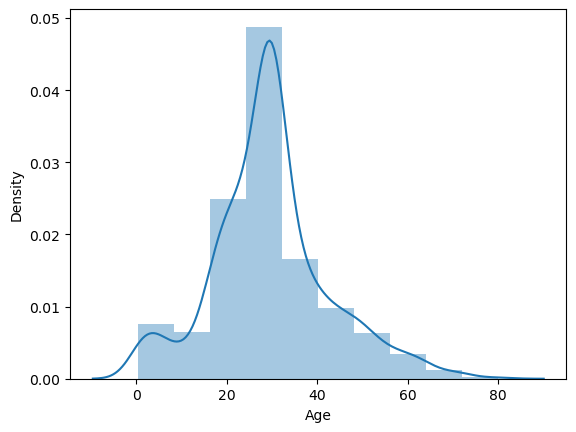

In [511]:
# distplot => 곧 사라짐 
sns.distplot(data['Age'], bins=10)

In [512]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [514]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

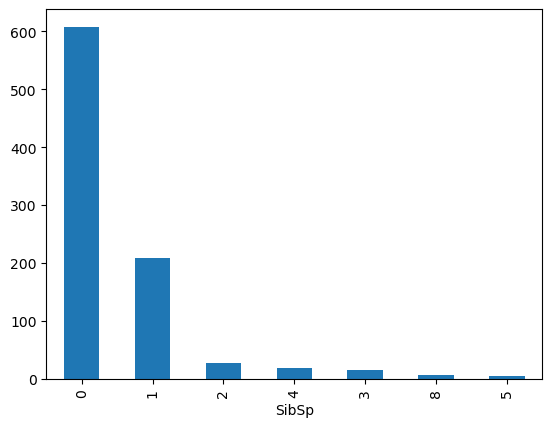

In [517]:
data['SibSp'].value_counts().plot(kind='bar')

In [515]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

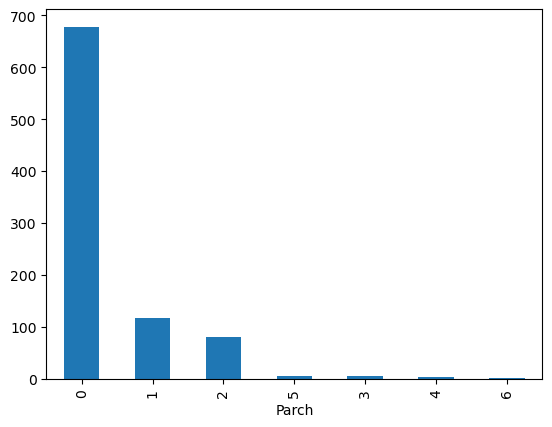

In [518]:
data['Parch'].value_counts().plot(kind='bar')

In [519]:
data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: ylabel='Frequency'>

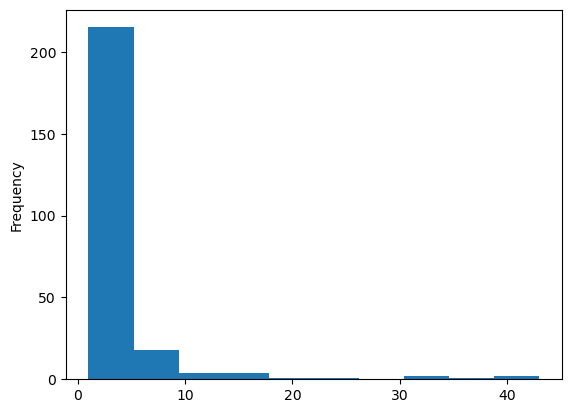

In [521]:
data['Fare'].value_counts().plot(kind='hist')

<Axes: xlabel='Fare', ylabel='Count'>

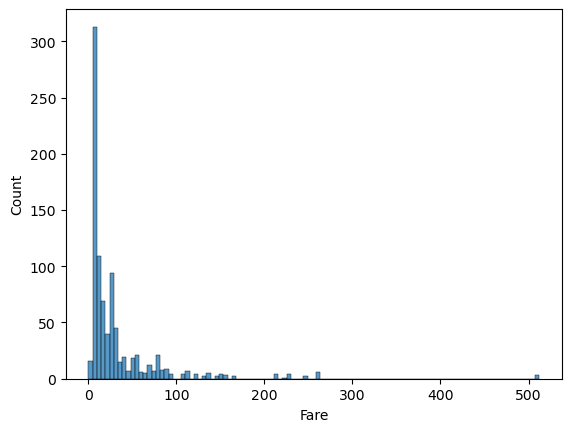

In [531]:
sns.histplot(data['Fare'])

In [522]:
data['Embarked'].value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

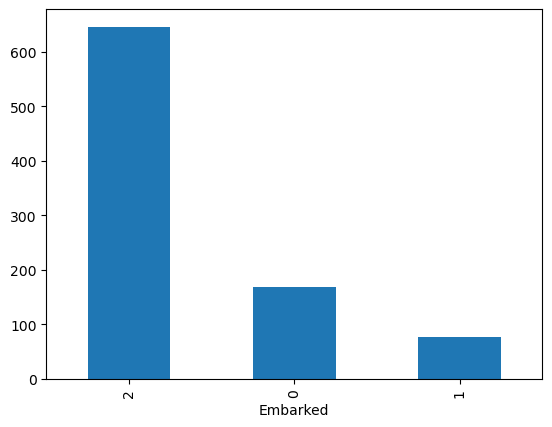

In [533]:
data['Embarked'].value_counts().plot(kind='bar')

In [534]:
le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

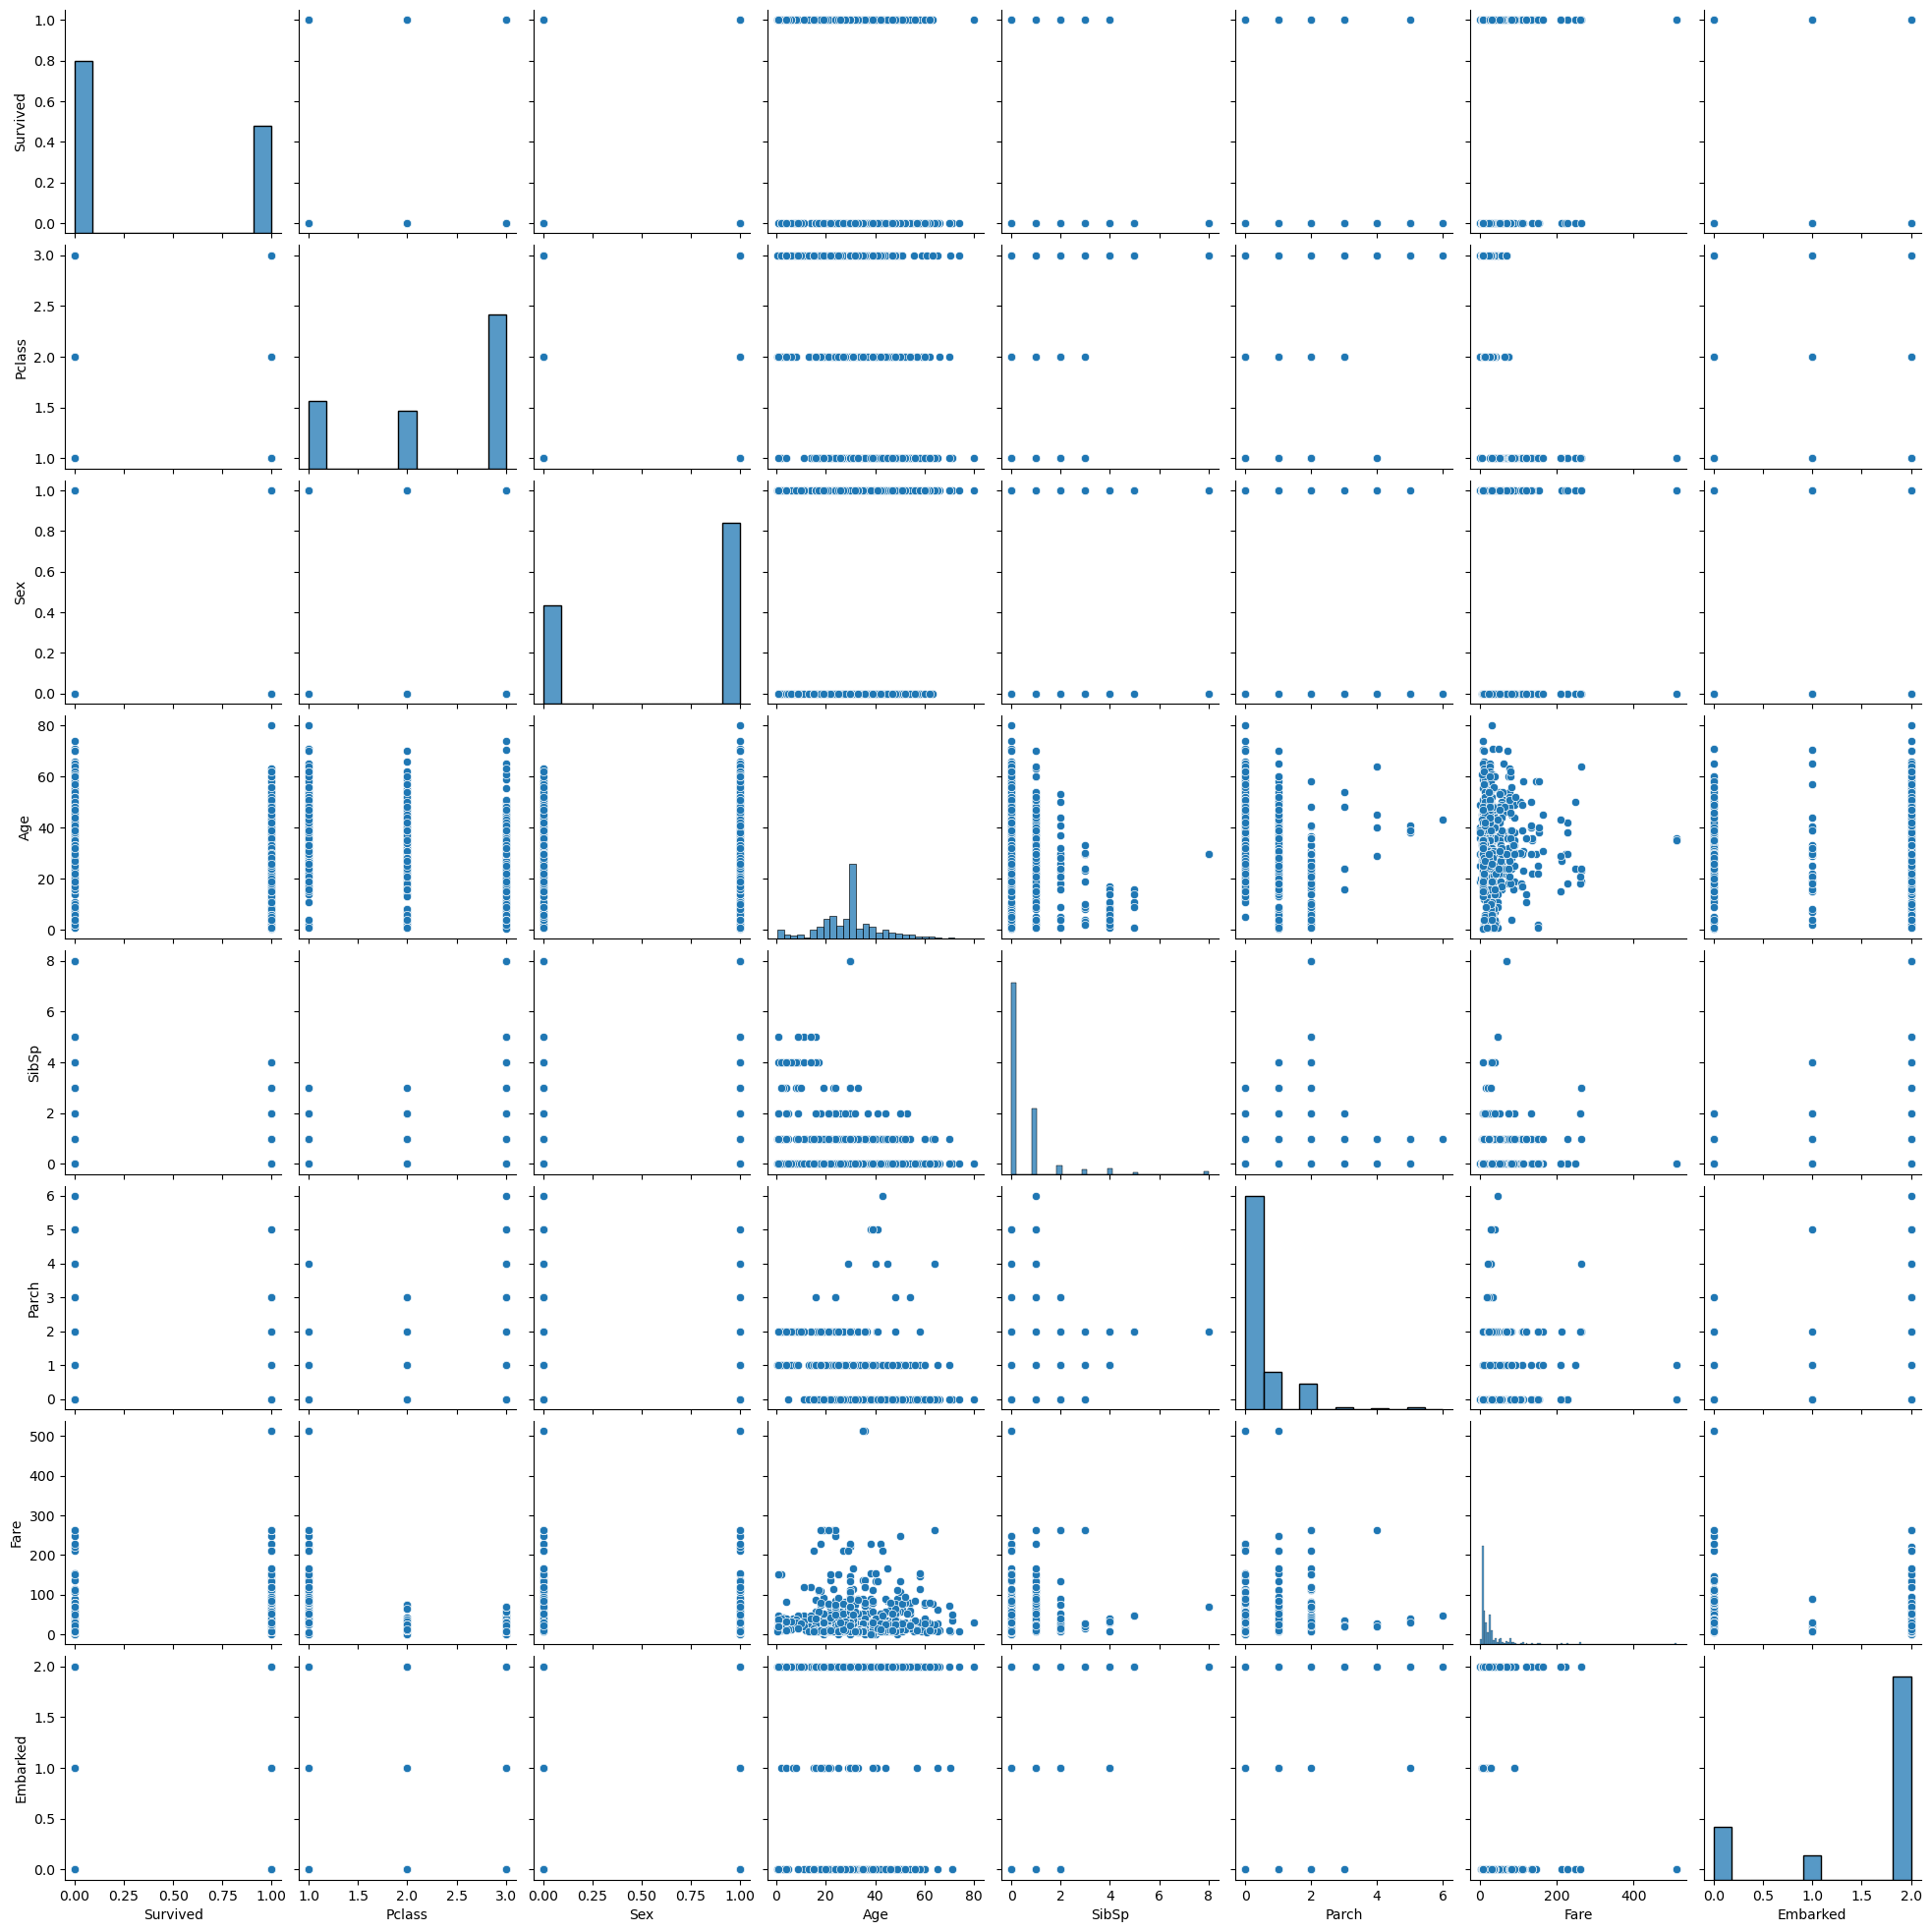

In [535]:
sns.pairplot(data)

<Axes: >

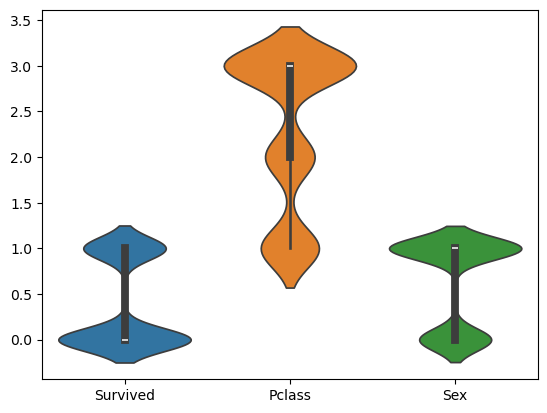

In [537]:
sns.violinplot(data[['Survived', 'Pclass', 'Sex']])

<Axes: ylabel='Density'>

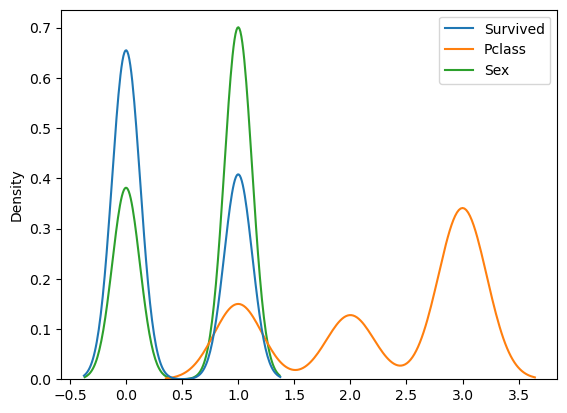

In [538]:
sns.kdeplot(data[['Survived', 'Pclass', 'Sex']])

# groupby로 독립변수& 종속변수 간의 규칙 찾기

In [539]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Pclass,Survived'>

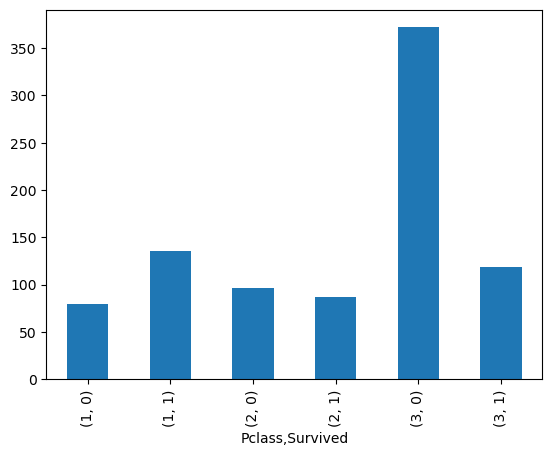

In [542]:
data[['Survived', 'Pclass']].groupby('Pclass').value_counts(sort=False).plot(kind='bar')

* Pclass = 1, 생존 > 사망
* Pclass = 2, 생존 < 사망
* Pclass = 3, 생존 <<< 사망

<Axes: xlabel='Sex,Survived'>

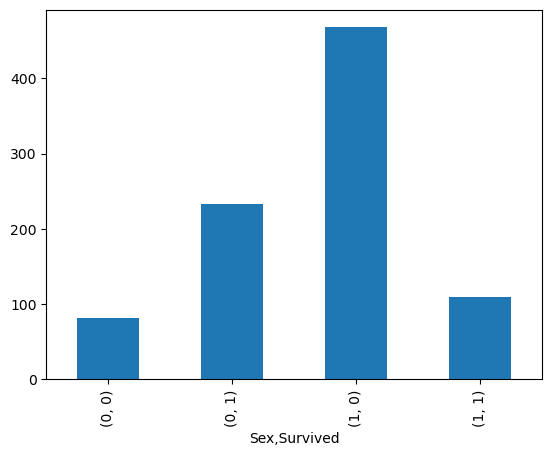

In [545]:
data[['Survived', 'Sex']].groupby('Sex').value_counts(sort=False).plot(kind='bar')

In [546]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

* 성별 = 여성 > 생존률 높음
* 성별 = 남성 > 생존률 낮음

<Axes: xlabel='SibSp,Survived'>

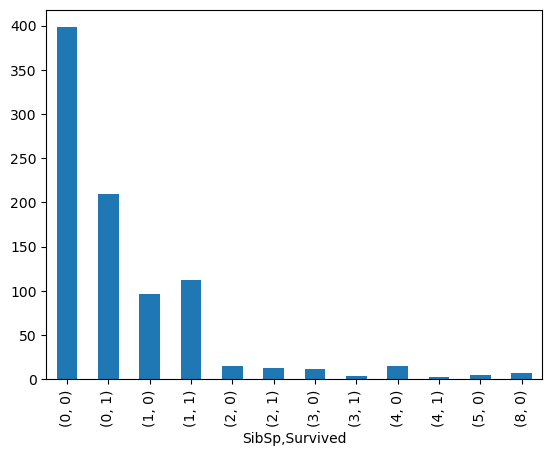

In [553]:
data[['SibSp', 'Survived']].groupby('SibSp').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='Parch,Survived'>

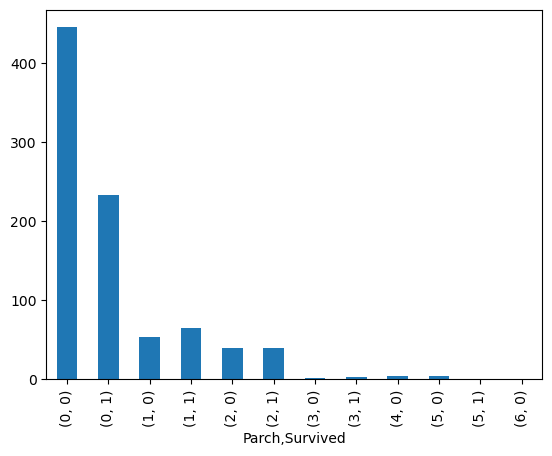

In [554]:
data[['Parch', 'Survived']].groupby('Parch').value_counts(sort=False).plot(kind='bar')

In [559]:
# Embarked에 대한 전체 컬럼 보여줌
data.groupby('Embarked').value_counts(sort=False)

Embarked  Survived  Pclass  Sex  Age   SibSp  Parch  Fare    
0         0         1       0    50.0  0      0      28.7125     1
                            1    18.0  1      0      108.9000    1
                                 22.0  0      0      135.6333    1
                                 24.0  0      0      79.2000     1
                                              1      247.5208    1
                                                                ..
2         1         3       1    32.0  0      0      8.0500      1
                                                     56.4958     2
                                 39.0  0      0      7.9250      1
                                 44.0  0      0      7.9250      1
                                 45.0  0      0      8.0500      1
Name: count, Length: 780, dtype: int64

In [560]:
data.groupby('Embarked')['Survived'].value_counts(sort=False)

Embarked  Survived
0         0            75
          1            93
1         0            47
          1            30
2         0           427
          1           219
Name: count, dtype: int64

<Axes: xlabel='Embarked,Survived'>

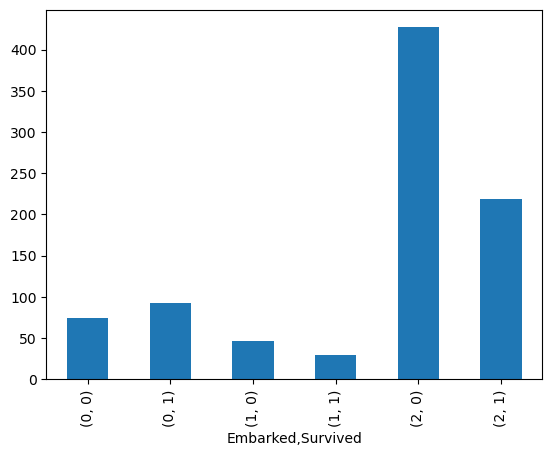

In [561]:
# data[['Parch', 'Survived']].groupby('Parch').value_counts(sort=False).plot(kind='bar')
# 위 코드랑 동일한데 명칭 두 번 안 쓰고 한 번에 밑에 코드처럼 작성해야 더 간편함
data.groupby('Embarked')['Survived'].value_counts(sort=False).plot(kind='bar')

In [562]:
le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

# 연속형 데이터인 경우 구간화를 통해 명목변수로 변환

조건문으로 Age 컬럼 구간화 하기

In [566]:
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [570]:
data['Age'].max()

np.float64(80.0)

In [573]:
def ages(x):
    if 0 < x < 10:
        return "under 10"
    elif 10 <= x < 20:
        return "10s"
    elif 20 <= x < 30:
        return "20s"
    elif 30 <= x < 40:
        return "30s"
    elif 40 <= x < 50:
        return "40s"
    elif 50 <= x < 60:
        return "50s"
    elif 60 <= x < 70:
        return "60s"
    elif 70 <= x < 80:
        return "70s"
    elif 80 <= x < 90:
        return "80s"

In [575]:
data['Age'] = data['Age'].apply(ages)

In [576]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,20s,1,0,7.2500,2
1,1,1,0,30s,1,0,71.2833,0
2,1,3,0,20s,0,0,7.9250,2
3,1,1,0,30s,1,0,53.1000,2
4,0,3,1,30s,0,0,8.0500,2


In [579]:
data[['Age', 'Survived']].groupby('Age').value_counts(sort=False)

Age       Survived
10s       0            61
          1            41
20s       0           268
          1           129
30s       0            94
          1            73
40s       0            55
          1            34
50s       0            28
          1            20
60s       0            13
          1             6
70s       0             6
80s       1             1
under 10  0            24
          1            38
Name: count, dtype: int64

In [580]:
# 10대
41 / (41+61)

0.4019607843137255

In [581]:
# 20대
129 / (129+268)

0.3249370277078086

In [582]:
# 30대
73 / (73+94)

0.437125748502994

In [583]:
# 40대
34 / (34+55)

0.38202247191011235

In [584]:
# 50대
20 / (20+28)

0.4166666666666667

In [585]:
# 60대
6 / (6+13)

0.3157894736842105

In [588]:
# 80대
100

100

In [589]:
# 10대 미만
38 / (38+24)

0.6129032258064516

<Axes: xlabel='Age,Survived'>

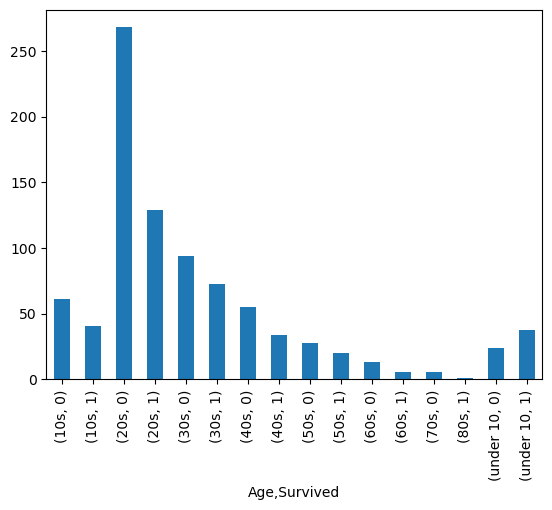

In [578]:
# 나이 구간화한 후 코드
data[['Age', 'Survived']].groupby('Age').value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='Age,Survived'>

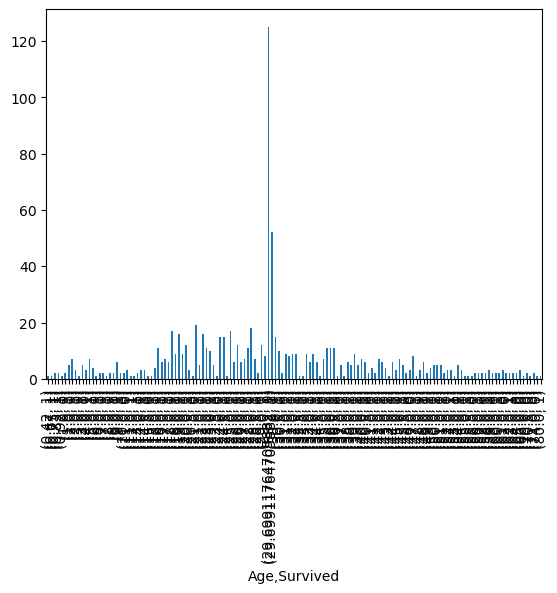

In [565]:
# 기존 코드
data[['Age', 'Survived']].groupby('Age').value_counts(sort=False).plot(kind='bar')

### Pclass별, 성별별 생존률

In [595]:
data.groupby(['Pclass', 'Sex'])['Survived'].value_counts(sort=False)

Pclass  Sex  Survived
1       0    0             3
             1            91
        1    0            77
             1            45
2       0    0             6
             1            70
        1    0            91
             1            17
3       0    0            72
             1            72
        1    0           300
             1            47
Name: count, dtype: int64

<Axes: xlabel='Pclass,Sex,Survived'>

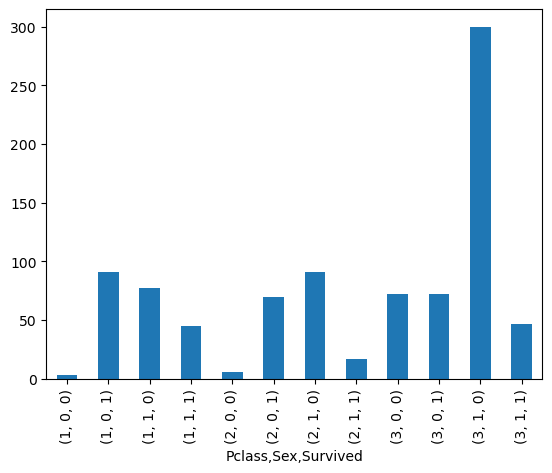

In [591]:
data.groupby(['Pclass', 'Sex'])['Survived'].value_counts(sort=False).plot(kind='bar')

### Pclass별, 성별별, 나이별 생존률

In [597]:
data[['Pclass', 'Sex', 'Age', 'Survived']].groupby(['Pclass', 'Sex', 'Age']).value_counts(sort=False)

Pclass  Sex  Age       Survived
1       0    10s       1           13
             20s       0            1
                       1           24
             30s       1           27
             40s       1           13
                                   ..
3       1    50s       0            6
             60s       0            2
             70s       0            2
             under 10  0           13
                       1            8
Name: count, Length: 70, dtype: int64

<Axes: xlabel='Pclass,Sex,Age,Survived'>

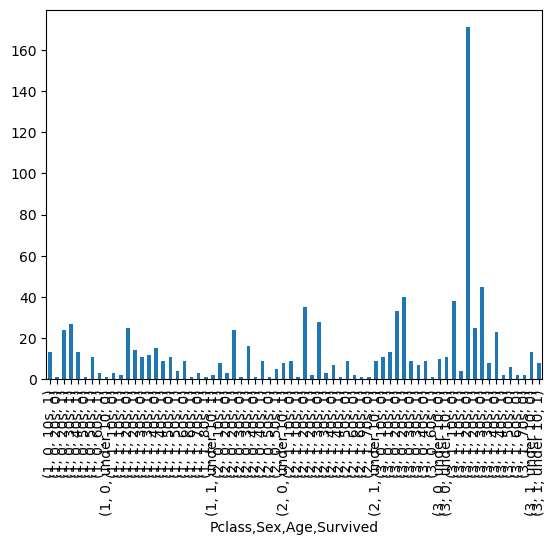

In [598]:
data[['Pclass', 'Sex', 'Age', 'Survived']].groupby(['Pclass', 'Sex', 'Age']).value_counts(sort=False).plot(kind='bar')

In [599]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,20s,1,0,7.2500,2
1,1,1,0,30s,1,0,71.2833,0
2,1,3,0,20s,0,0,7.9250,2
3,1,1,0,30s,1,0,53.1000,2
4,0,3,1,30s,0,0,8.0500,2


In [600]:
data = data.drop('Fare', axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,20s,1,0,2
1,1,1,0,30s,1,0,0
2,1,3,0,20s,0,0,2
3,1,1,0,30s,1,0,2
4,0,3,1,30s,0,0,2


# Feature Engineering : 변수 선택, 새로운 변수 생성

In [601]:
# EDA 과정에서 처리했지만 원래는 따로 ?

In [603]:
# 형제 자매는 가족으로 묶어도 됨
data['Family'] = data['SibSp'] + data['Parch']

In [604]:
data['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [606]:
data.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,1,20s,1,0,2,1
1,1,1,0,30s,1,0,0,1
2,1,3,0,20s,0,0,2,0
3,1,1,0,30s,1,0,2,1
4,0,3,1,30s,0,0,2,0
5,0,3,1,20s,0,0,1,0
6,0,1,1,50s,0,0,2,0
7,0,3,1,under 10,3,1,2,4
8,1,3,0,20s,0,2,2,2
9,1,2,0,10s,1,0,0,1


In [607]:
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,20s,2,1
1,1,1,0,30s,0,1
2,1,3,0,20s,2,0
3,1,1,0,30s,2,1
4,0,3,1,30s,2,0


# 카테고리 변수의 더미변수화 : get_dummies

In [610]:
# 실행 2번 해서 오류 => 이미 처리된 코드
data = pd.get_dummies(data, columns=['Sex', 'Age', 'Embarked', 'Family'], drop_first=True)

KeyError: "None of [Index(['Sex', 'Age', 'Embarked', 'Family'], dtype='object')] are in the [columns]"

In [611]:
data.head()

,Survived,Pclass,Sex_1,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,...,Embarked_1,Embarked_2,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,0,3,True,True,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,1,1,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1,3,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,1,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
4,0,3,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# 종속변수(y)& 독립변수(x) 분리

In [613]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [615]:
X

,Pclass,Sex_1,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under 10,Embarked_1,Embarked_2,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,3,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,1,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,3,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
887,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
888,3,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
889,1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [616]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [621]:
# test_size => 훈련 데이터 얼마나 쓰는 지에 따라서도 달라짐
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [622]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report
# 전처리 제대로 한 상태에서는 퍼센트가 달라짐 ? ?
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       168
           1       0.87      0.61      0.72       100

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.79       268
weighted avg       0.83      0.82      0.81       268



### 1. 타이타닉 데이터 로딩
### 2. 데이터 전처리 : 데이터 타입 변환, 결측치 처리, 이상값 탐지
### 3. EDA : 탐색적 데이터분석 - 각 컬럼별 데이터 분포(value_counts), 그래프, 상관분석, groupby로 target 변수(종속변수)와의 관계 분석
### 4. Feature Engineering : 변수 선택, 새로운 특성 생성, 카테고리 변수의 더미변수화/label encoding(문자 => 숫자)
### 5. 최종 선택된 변수를 독립변수(X), 종속변수(y)로 나눔
### 6. train_test_split을 이용해서 train(훈련용 데이터), test(검증용 데이터)로 나눔 = 홀드아웃 
### 7. 분류 알고리즘을 불러와서 훈련(학습) => 분류 모델 생성
### 8. 모델의 성능 평가(accuracy_score : 정확도)
### 9. 모델 성능 개선 4 - 8 반복 + 하이퍼파라미터 튜닝

## 훈련 데이터& 테스트 데이터 비율 변화로 성능 튜닝하기

정확도 Accuracy : 정답을 정답, 오답을 오답으로 맞춘 것 : 1, 1, 0, 0

In [622]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)ㅊ
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       168
           1       0.87      0.61      0.72       100

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.79       268
weighted avg       0.83      0.82      0.81       268



In [631]:
# 정확도가 높은 게 중요한 것이 아님. 분석 목적에 따라서 달라질 수 있고, 지표를 잘 봐야함
for ts in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts/10, random_state = 8)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("ts/10 :", ts/10)
    print()
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

ts/10 : 0.1

0.8
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        58
           1       0.69      0.78      0.74        32

    accuracy                           0.80        90
   macro avg       0.78      0.80      0.79        90
weighted avg       0.81      0.80      0.80        90

ts/10 : 0.2

0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       108
           1       0.80      0.66      0.72        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

ts/10 : 0.3

0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       168
           1       0.87      0.61      0.72       100

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.79    

# 하이퍼파라미터 튜닝으로 성능 개선하기

In [638]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [639]:
for i in range(1, 20):
    dtc = DecisionTreeClassifier(max_depth=6, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.835820895522388
1               precision    recall  f1-score   support

           0       0.81      0.96      0.88       168
           1       0.91      0.62      0.74       100

    accuracy                           0.84       268
   macro avg       0.86      0.79      0.81       268
weighted avg       0.85      0.84      0.83       268

2 0.835820895522388
2               precision    recall  f1-score   support

           0       0.81      0.96      0.88       168
           1       0.91      0.62      0.74       100

    accuracy                           0.84       268
   macro avg       0.86      0.79      0.81       268
weighted avg       0.85      0.84      0.83       268

3 0.835820895522388
3               precision    recall  f1-score   support

           0       0.81      0.96      0.88       168
           1       0.91      0.62      0.74       100

    accuracy                           0.84       268
   macro avg       0.86      0.79      0.81       268
weighted

# criterion : 분류 알고리즘 변경하면서 최적화

In [642]:
for i in range(1, 10):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7723880597014925
1               precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.72      0.63      0.67       100

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

2 0.7649253731343284
2               precision    recall  f1-score   support

           0       0.73      0.98      0.84       168
           1       0.93      0.40      0.56       100

    accuracy                           0.76       268
   macro avg       0.83      0.69      0.70       268
weighted avg       0.81      0.76      0.74       268

3 0.7835820895522388
3               precision    recall  f1-score   support

           0       0.80      0.88      0.84       168
           1       0.75      0.63      0.68       100

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weigh

In [643]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8246268656716418
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.80      0.71      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



# log_loss로 분석

In [646]:
for i in range(1, 10):
    dtc = DecisionTreeClassifier(criterion='log_loss', max_depth=i, random_state=8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7723880597014925
1               precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.72      0.63      0.67       100

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

2 0.7649253731343284
2               precision    recall  f1-score   support

           0       0.73      0.98      0.84       168
           1       0.93      0.40      0.56       100

    accuracy                           0.76       268
   macro avg       0.83      0.69      0.70       268
weighted avg       0.81      0.76      0.74       268

3 0.7835820895522388
3               precision    recall  f1-score   support

           0       0.80      0.88      0.84       168
           1       0.75      0.63      0.68       100

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weigh

In [647]:
dtc = DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8246268656716418
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.80      0.71      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



### DecisionTree => 시각화 가능

# 의사결정나무(DecisionTree) 시각화

In [648]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [657]:
X_train.columns

Index(['Pclass', 'Sex_1', 'Age_20s', 'Age_30s', 'Age_40s', 'Age_50s',
       'Age_60s', 'Age_70s', 'Age_80s', 'Age_under 10', 'Embarked_1',
       'Embarked_2', 'Family_1', 'Family_2', 'Family_3', 'Family_4',
       'Family_5', 'Family_6', 'Family_7', 'Family_10'],
      dtype='object')

[Text(0.5208333333333334, 0.9, 'Sex_1 <= 0.5\nlog_loss = 0.964\nsamples = 623\nvalue = [381, 242]'),
 Text(0.3125, 0.7, 'Pclass <= 2.5\nlog_loss = 0.813\nsamples = 227\nvalue = [57, 170]'),
 Text(0.4166666666666667, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'Family_3 <= 0.5\nlog_loss = 0.275\nsamples = 127\nvalue = [6, 121]'),
 Text(0.08333333333333333, 0.3, 'Pclass <= 1.5\nlog_loss = 0.214\nsamples = 118\nvalue = [4, 114]'),
 Text(0.041666666666666664, 0.1, 'log_loss = 0.108\nsamples = 70\nvalue = [1, 69]'),
 Text(0.125, 0.1, 'log_loss = 0.337\nsamples = 48\nvalue = [3, 45]'),
 Text(0.25, 0.3, 'Pclass <= 1.5\nlog_loss = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.20833333333333334, 0.1, 'log_loss = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2916666666666667, 0.1, 'log_loss = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4583333333333333, 0.5, 'Age_40s <= 0.5\nlog_loss = 1.0\nsamples = 100\nvalue = [51, 49]'),
 Text(0.4166666666666667, 0.3, 'Family_4 <= 0.5\nlog_loss = 0.999\nsa

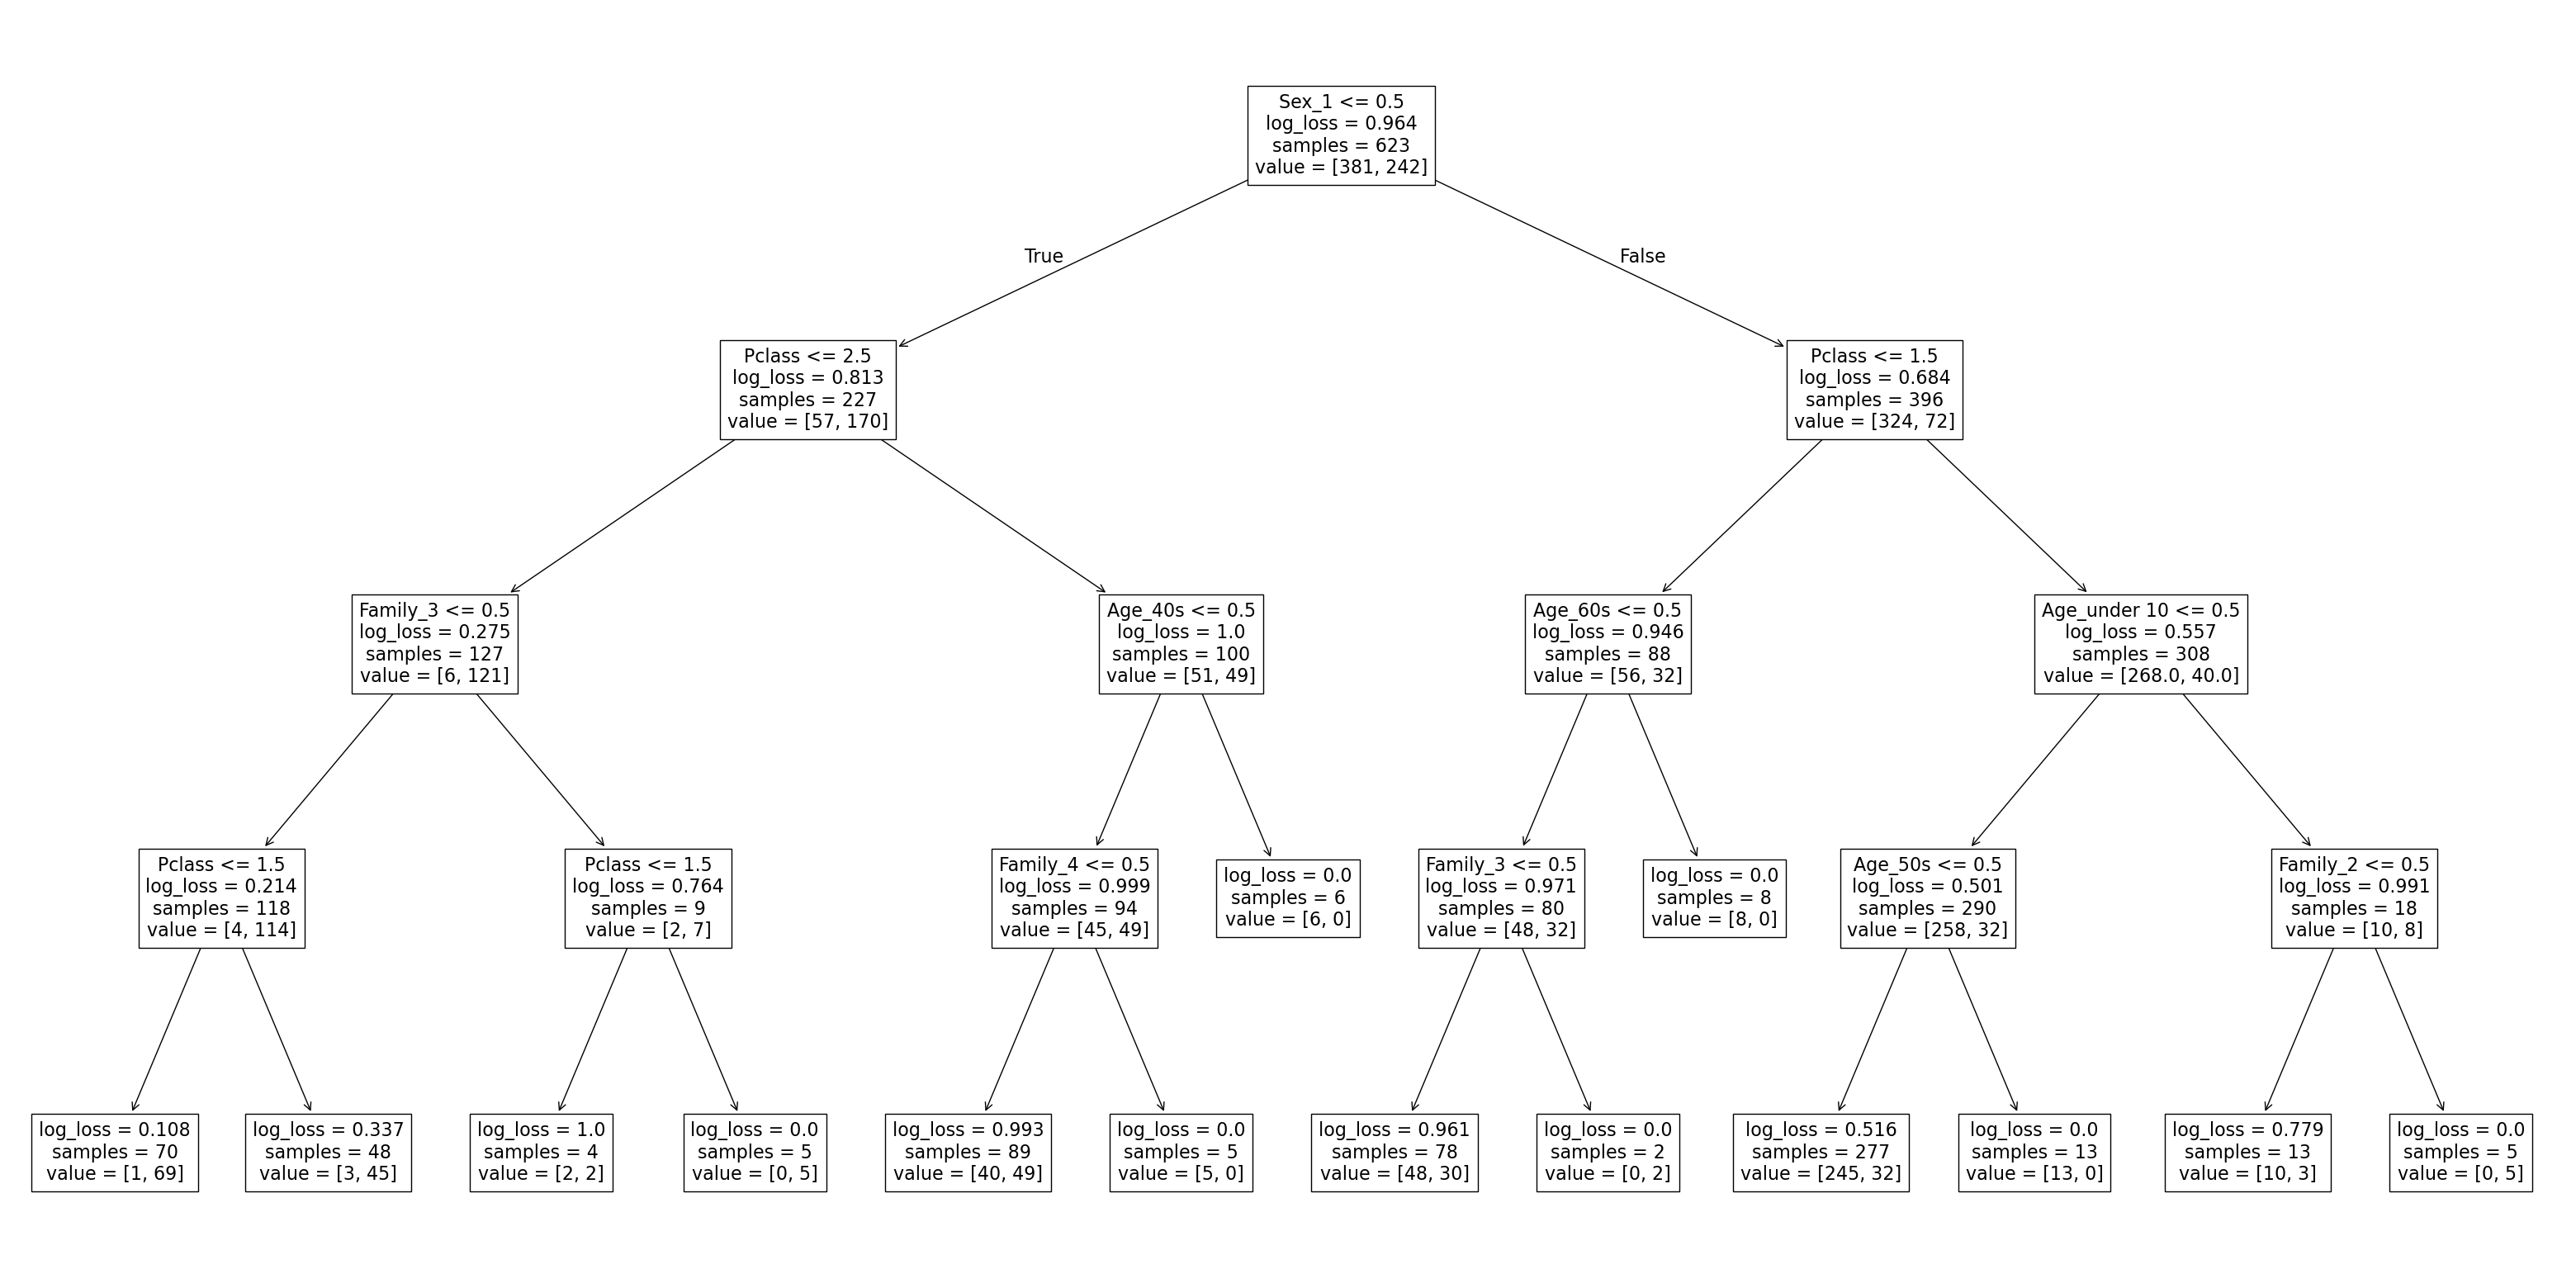

In [659]:
plt.figure(figsize=(40,20))
plot_tree(dtc, feature_names=X_train.columns)

In [ ]:
# from sklearn.tree import DecisionTreeRegressor